***
<img src="images/Logo_Università_Padova.png" alt="Drawing" style="width: 500px;"/>

# AS4PA Final Project
# Study of rare $\Lambda_b^0$ decay using multivariate analysis techniques

### Authors
* [Ardino Rocco](https://github.com/RoccoA97) (University of Padua)
* [Valente Alessandro](https://github.com/mastrovalentz) (University of Padua)
***

***
# Index <a class="anchor" id="FP.i"></a>

* 1. [Introduction](#AS4PA_FP.1.)
* 2. [Datasets and features plots](#AS4PA_FP.2.)
    * 2.1. [Background and signal simulated dataset](#FP.2.1.)
    * 2.2. [LHCb dataset](#FP.2.2.)
***

***
## 1. - Introduction <a class="anchor" id="AS4PA_FP.1."></a>
* [Index](#FP.i)

This is the report for the final project of Advanced Statistics for Physics Analysis course (A.Y. 2019/20).

The object of study is a classical problem of signal over background recognition, but we try to tackle this task through a machine learning approach. In particular, we exploit the power of Neural Networks for our purpose and we perform several grid searches to optimize the hyperparameters of the network.

Concerning the physical problem under study, we use as a benchmark the rare decay of $\Lambda_b^0$ baryon. Its decay channel into a $\Lambda_c^+$ baryon and three pions

$$
\Lambda_b^0
\longrightarrow
\Lambda_c^+ 3\pi
$$

has never been observed. This choice is due to the fact that it is a fundamental ingredient for the studies of lepton universality in semileptonic $\Lambda_b^0$ decays. So, a sample of LHCb is taken into account, with multiple observables useful for discriminating signal from background events.

In summary, our main concerns will be:
* before going on with the learning algorithms, the visualization of the features for both signal and background datasets, in order to find which are the ones with greater discriminating power;
* the construction of the Neural Network and of the learning algorithm in R;
* optimizing the disciminating power of the trained Network by tuning the hyperparameters, such as the numbers of neuron and layers, the optimizer, the regularizers and some other learning stuff;
* testing the performances of the trained and tuned Network on a dataset from LHCb collaboration.
***

***
## 2. - The Dataset <a class="anchor" id="AS4PA_FP.2."></a>
* [Index](#FP.i)

Now, we load the three datasets needed for the analysis. They can be found [here](https://drive.google.com/drive/u/1/folders/1xKJ0dwvtmua-6UiqeI0TiacnlKsNqvWL).
Since the three datasets are stored in ```csv``` files, we exploit the R function ```read.csv``` to load them.
***

In [2]:
data.bkg  <- read.csv("../data/background.csv")
data.sig  <- read.csv("../data/MC_signal.csv")
data.lhcb <- read.csv("../data/data_lhcb.csv")

In [24]:
cat("Dataset: Background simulated -> data.frame",   dim(data.bkg)[1],  "x", dim(data.bkg)[2],  "\n")
cat("Dataset: Signal simulated     -> data.frame  ", dim(data.sig)[1],  "x", dim(data.sig)[2],  "\n")
cat("Dataset: LHCb                 -> data.frame",   dim(data.lhcb)[1], "x", dim(data.lhcb)[2], "\n")

Dataset: Background simulated -> data.frame 403158 x 29 
Dataset: Signal simulated     -> data.frame   1490 x 29 
Dataset: LHCb                 -> data.frame 472750 x 29 


***
After loading all the data in R, some of the main features of the datasets are visualized in order to clearly understand which are the ones with higher discriminating power between signal and background. A table of these features is given, showing their identification code.

| Feature Id | Feature Code               | Feature Meaning                                      |
| :-:        | :-:                        | :-:                                                  |
| 2          | <b>lcstar_MM_F               </b> | ???                                                  |
| 3          | <b>Lambda_c_MM_F             </b> | $\Lambda_c^+$ mass                                   |
| 4          | <b>Lambda_b0_MM_F            </b> | $\Lambda_b^0$ mass                                   |
| 5         | <b>lc_p_ProbNNp_F            </b> | Probability of $\Lambda_c^+p$ identified as a proton |
| 6         | <b>lcZDecLSigma_F            </b> | ???                                                  |
| 7         | <b>lcstarZDecLSigma_F        </b> | ???                                                  |
| 8         | <b>lcDecTime_F               </b> | $\Lambda_c^+$ decay time                             |
| 9         | <b>lcstarDecTime_F           </b> | $\Lambda_c^*$ decay time                             |
| 10         | <b>lbDecTime_F               </b> | $\Lambda_b^0$ decay time                             |
| 11         | <b>lcDecVerChi2_F            </b> | $\Lambda_c^+$ decay vertex                           |
| 12         | <b>lcstarDecVerChi2_F        </b> | $\Lambda_c^*$ decay vertex                           |
| 13         | <b>lbDecVerChi2_F            </b> | $\Lambda_b^0$ decay vertex                           |
| 14         | <b>Lambda_b0_DIRA_OWNPV_F    </b> | ???                                                  |
| 15         | <b>DeltaM_F                  </b> | $\Delta M$                                           |
| 16         | <b>pair_lcstar_F             </b> | Pair mass of the two $\pi$ of the $\Lambda_c^{∗+}$   |
| 17         | <b>pair0_3pi_F               </b> | Pair mass of the two $\pi_0$ and $\pi_1$ (???)       |
| 18         | <b>pair1_3pi_F               </b> | Pair mass of the two $\pi_1$ and $\pi_2$ (???)       |
| 19         | <b>Lambda_b0_BKGCAT_F        </b> | ???                                                  |
| 20         | <b>lcstar_BKGCAT_F           </b> | ???                                                  |
| 21         | <b>Lambda_c_BKGCAT_F         </b> | ???                                                  |
| 22         | <b>tau_pion0_ProbNNpi_F      </b> | ???                                                  |
| 23         | <b>tau_pion1_ProbNNpi_F      </b> | ???                                                  |
| 24         | <b>tau_pion2_ProbNNpi_F      </b> | ???                                                  |
| 25         | <b>lcstar_pim_ProbNNpi_F     </b> | ???                                                  |
| 26         | <b>lcstar_pip_ProbNNpi_F     </b> | ???                                                  |
| 27         | <b>Lambda_b0_ENDVERTEX_CHI2_F</b> | ???                                                  |
| 28         | <b>Lambda_c_ENDVERTEX_CHI2_F </b> | ???                                                  |
| 29         | <b>lcstar_ENDVERTEX_CHI2_F   </b> | ???                                                  |

### 2.1. - Background and signal simulated dataset <a class="anchor" id="AS4PA_FP.2.1."></a>
* [Index](#FP.i)

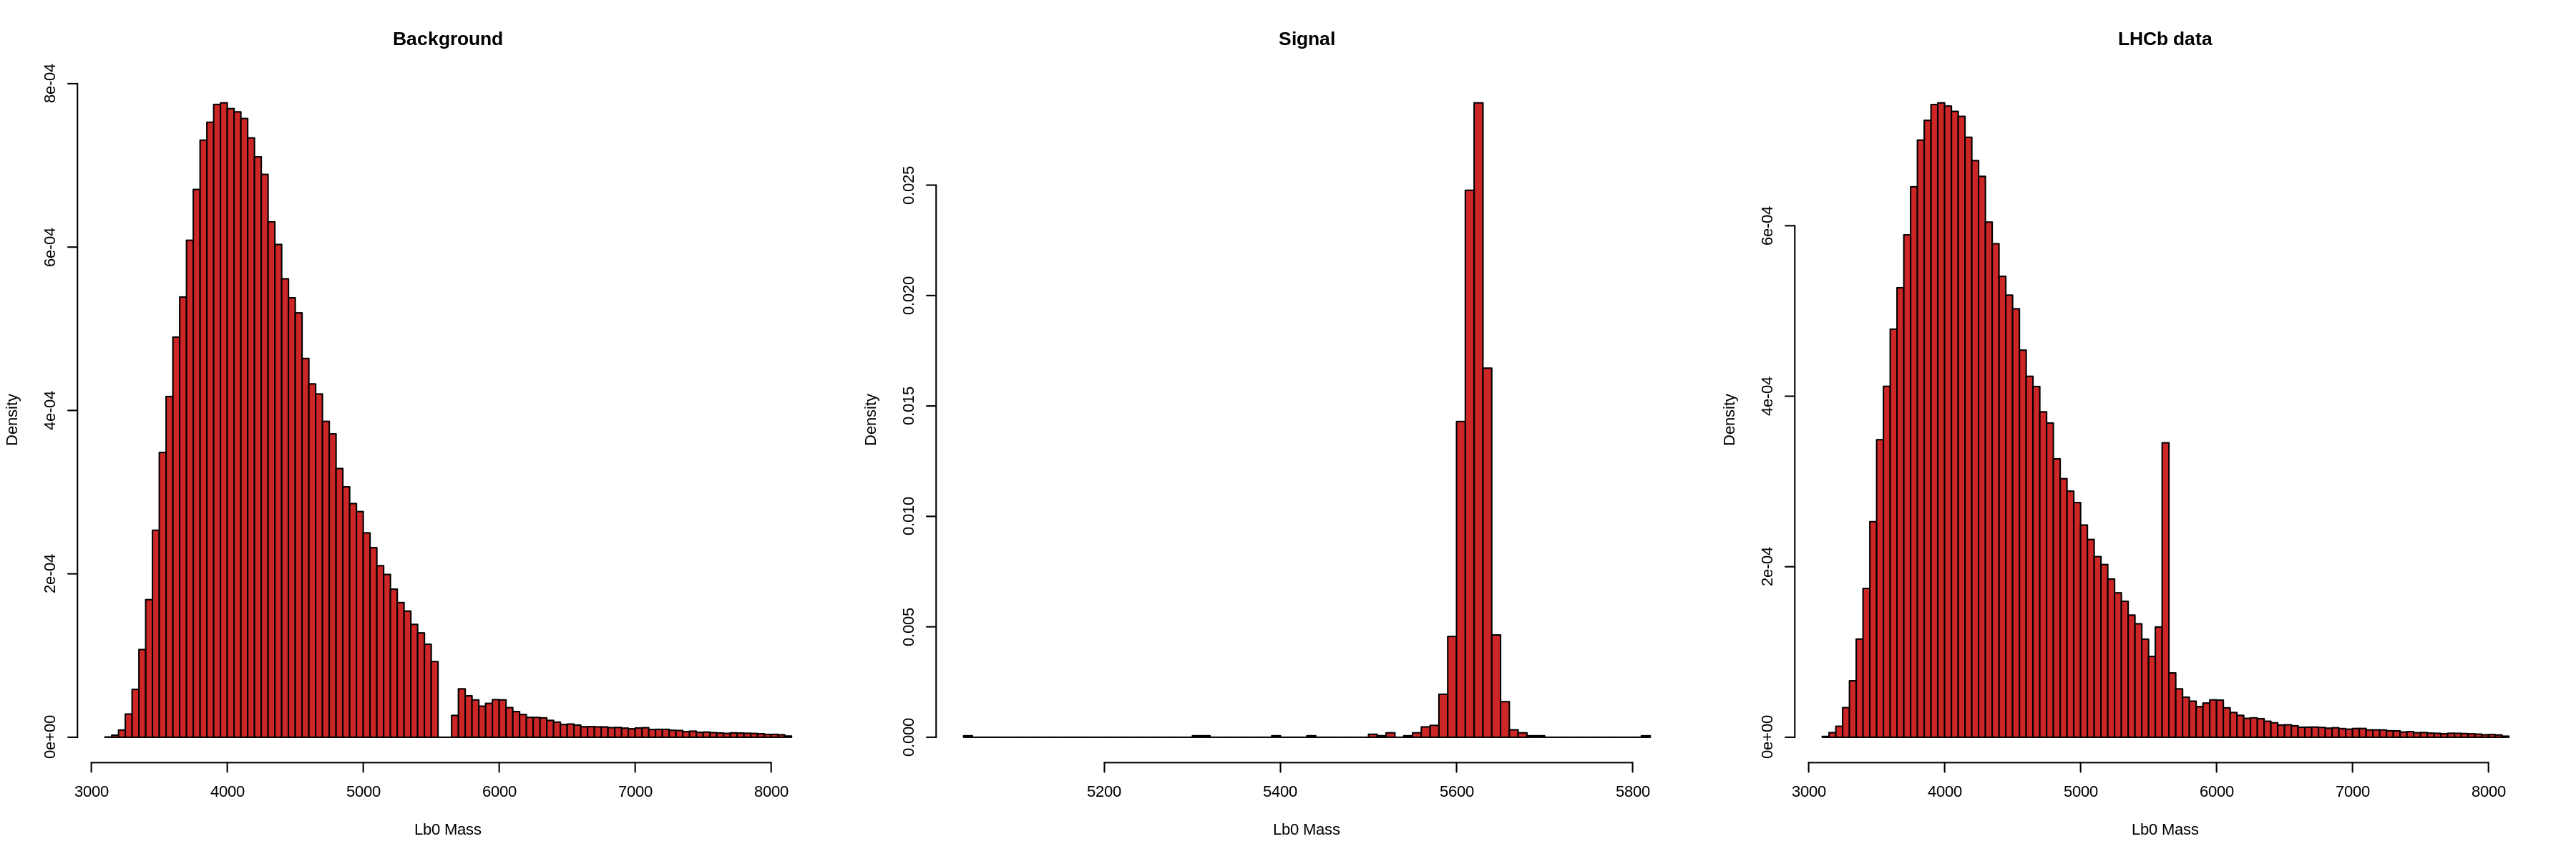

In [35]:
par(mfrow=c(1,3))
options(repr.plot.width=18, repr.plot.height=6, repr.plot.res=200)
hist(data.bkg$Lambda_b0_MM_F,  breaks=100, col="firebrick3", xlab="Lb0 Mass", main="Background", probability=TRUE)
hist(data.sig$Lambda_b0_MM_F,  breaks=100, col="firebrick3", xlab="Lb0 Mass", main="Signal",     probability=TRUE)
hist(data.lhcb$Lambda_b0_MM_F, breaks=100, col="firebrick3", xlab="Lb0 Mass", main="LHCb data",  probability=TRUE)

### 2.2. - LHCb dataset <a class="anchor" id="AS4PA_FP.2.2."></a>
* [Index](#FP.i)